# Evolution Strategies and RL

## Evolution Strategies

Blackbox of Evolution Strategies:
1. Input:  10000 settings
2. Output:  1 optimal setting

### Process
1. Start with random parameter, $w \in \mathbb{R}^M$, $M$ is number of candidates
2. Tweek the guess randomly, $w \mathrel{+}= \{w' \sim \mathcal{N}(
\mu, \sigma)\}^M$
3. move guess towards whatever tweaks work better, find the reward given the $M$ settings.
4. update vector is the weighted sum of the 1000 vectors (think attention on candidates)


In [1]:
#simple example: minimize a quadratic around some solution point
import numpy as np
import matplotlib.pyplot as plt
solution = np.array([0.5, 0.1, -0.3])
def f(w): 
    return -np.sum((w - solution)**2)

params=dict(npop = 50,sigma = 0.1, alpha = 0.001, num_iter=300)
def train_es(params):
    npop = params["npop"]
    sigma = params["sigma"]
    alpha = params["alpha"]
    num_iter = params["num_iter"]
    w = np.random.randn(3) # initial guess
    for i in range(num_iter):
        N = np.random.randn(npop, 3) #New Guess for N candidates
        R = np.zeros(npop)
        for j in range(npop):
            w_try = w + sigma*N[j] # Attempt
            R[j] = f(w_try) # Output Rewards
        A = (R - np.mean(R)) / np.std(R) #Normalize Rewards
        w = w + alpha/(npop*sigma) * np.dot(N.T, A) # Update Function
    return w

In [3]:
def evaluation(w, w_guess):
    return np.linalg.norm(w - w_guess)

# print(evaluation(solution, w))

In [4]:
def compare_hyper(param_key, param_range, params):
    errors = []
    for r in param_range:
        params[param_key] = r
        w = train_es(params)
        e = evaluation(solution, w)
        errors.append(e)
    plt.title(param_key + " vs l2 error ")
    plt.xlabel = param_key
    plt.ylabel = "l2 error"
    plt.plot(param_range, errors)
    plt.plot()
    print(np.argmin(errors))
    
    

#### Population Size


3


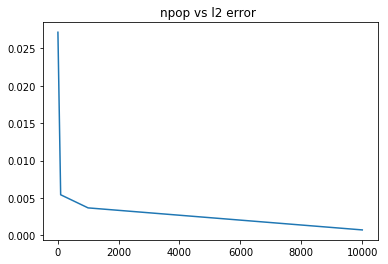

In [5]:
pop_size = 10**np.arange(1, 5)
compare_hyper("npop", pop_size, params)

### Num Iter

2


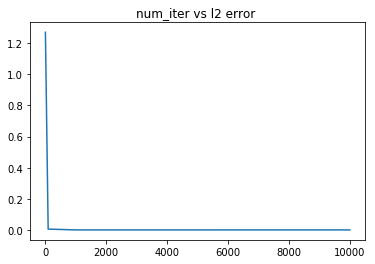

In [6]:
num_iter = 10**np.arange(1, 4)
compare_hyper("num_iter", pop_size, params)

### Tradeoffs between ES and RL

#### Advantages
1. No need for backpropogation
2. Highly parallelizable
3. Robustness in frame skip parameters (and other hyperparameters too, not sure where?)
4. Structured exploration; (no random jitters)
5. Credit assignment over long term scales

### Montezula's Revenge